In [1]:
#!pip uninstall tensorflow keras

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#!pip install --upgrade pip
#!pip install TensorFlow
import sys
import os
import json
import pandas
import numpy
import optparse
#!pip install keras --upgrade
from keras.callbacks import TensorBoard
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from keras.layers import Embedding
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from collections import OrderedDict

In [3]:
import os
print(os.getcwd())  # Print current working directory

#from google.colab import files
#uploaded = files.upload()

/content


In [4]:
data = pd.read_csv("final_data_2000-2010.csv")
data.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Chicago,United States",1/1/2000,9.6,2.0,5.6,8.5,-2.0,2.8,0.1,68.9,...,NaN,NaN,NaN,2000-01-01T07:18:19,2000-01-01T16:29:41,0.83,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"7,253,401,481,972,530,000,000"
1,"Chicago,United States",1/2/2000,16.0,2.8,9.4,16.0,-2.0,7.5,6.4,82.4,...,NaN,NaN,NaN,2000-01-02T07:18:25,2000-01-02T16:30:33,0.87,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,rain,"7,253,401,481,972,530,000,000"
2,"Chicago,United States",1/3/2000,4.6,1.7,3.2,1.1,-3.4,-1.3,1.6,89.7,...,NaN,NaN,NaN,2000-01-03T07:18:28,2000-01-03T16:31:26,0.90,"Snow, Rain, Overcast",Cloudy skies throughout the day with late afte...,rain,"7,253,401,481,972,530,000,000"
3,"Chicago,United States",1/4/2000,0.7,-4.2,-2.3,-4.7,-10.6,-8.5,-5.3,79.8,...,NaN,NaN,NaN,2000-01-04T07:18:29,2000-01-04T16:32:21,0.93,"Snow, Rain, Overcast",Cloudy skies throughout the day with early mor...,rain,"7,253,401,481,972,530,000,000"
4,"Chicago,United States",1/5/2000,-3.2,-9.4,-5.6,-9.1,-15.6,-11.9,-8.5,79.8,...,NaN,NaN,NaN,2000-01-05T07:18:28,2000-01-05T16:33:17,0.97,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"7,253,401,481,972,530,000,000"


In [5]:
data = data[["datetime","tempmax","tempmin","temp"]]
data['datetime'] = pd.to_datetime(data['datetime'])
data.sort_values(by="datetime", inplace=True)
data_tmax = data[["datetime","tempmax"]]
data_tmin = data[["datetime","tempmin"]]
data_tavg = data[["datetime","temp"]]

<ipython-input-5-503c98742f59>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['datetime'] = pd.to_datetime(data['datetime'])
<ipython-input-5-503c98742f59>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values(by="datetime", inplace=True)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3653 entries, 0 to 3652
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  3653 non-null   datetime64[ns]
 1   tempmax   3653 non-null   float64       
 2   tempmin   3653 non-null   float64       
 3   temp      3653 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 142.7 KB


In [7]:
data.head()

,datetime,tempmax,tempmin,temp
0,2000-01-01,9.6,2.0,5.6
1,2000-01-02,16.0,2.8,9.4
2,2000-01-03,4.6,1.7,3.2
3,2000-01-04,0.7,-4.2,-2.3
4,2000-01-05,-3.2,-9.4,-5.6


In [8]:
data.tail()

,datetime,tempmax,tempmin,temp
3648,2009-12-27,-6.2,-8.5,-6.8
3649,2009-12-28,-1.3,-9.2,-4.5
3650,2009-12-29,-4.5,-12.4,-8.4
3651,2009-12-30,-0.5,-8.6,-3.3
3652,2009-12-31,0.4,-11.4,-3.5


In [9]:
data.isnull().sum()

datetime    0
tempmax     0
tempmin     0
temp        0
dtype: int64

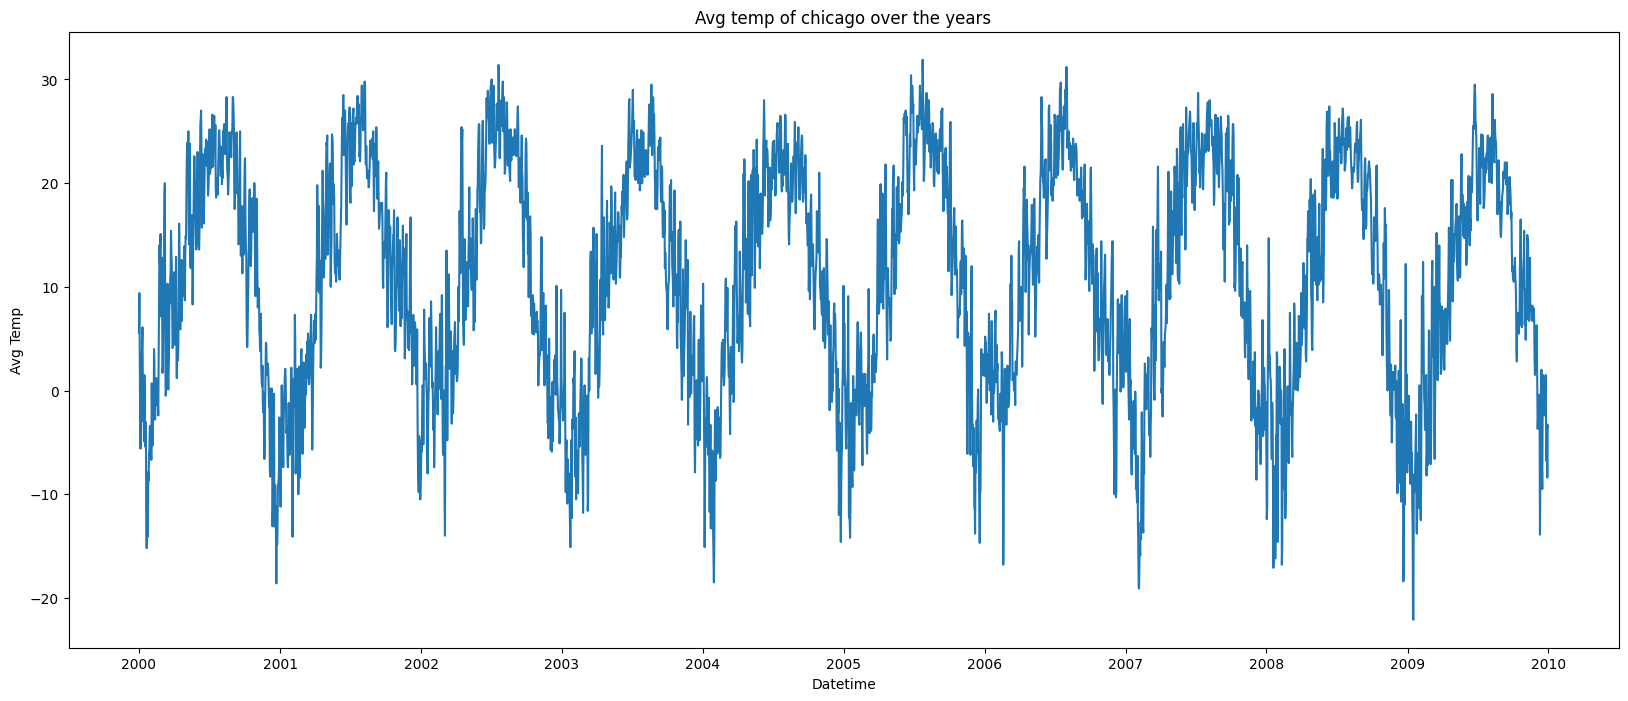

In [10]:
plt.figure(figsize=(20, 8))
plt.plot(data["datetime"], data['temp'])
plt.xlabel('Datetime')
plt.ylabel('Avg Temp')
plt.title('Avg temp of chicago over the years')
plt.show()

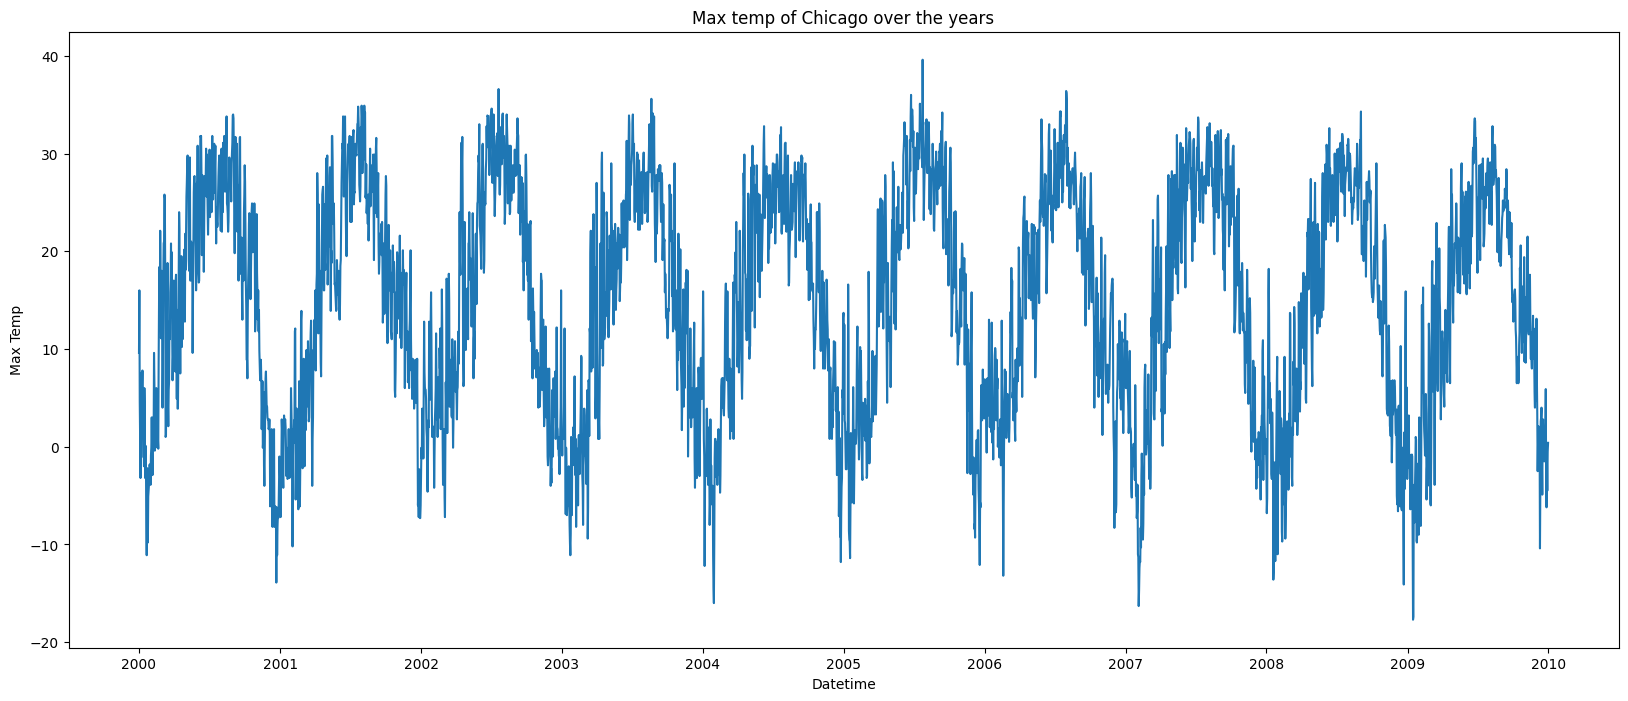

In [11]:
plt.figure(figsize=(20, 8))
plt.plot(data["datetime"], data['tempmax'])
plt.xlabel('Datetime')
plt.ylabel('Max Temp')
plt.title('Max temp of Chicago over the years')
plt.show()

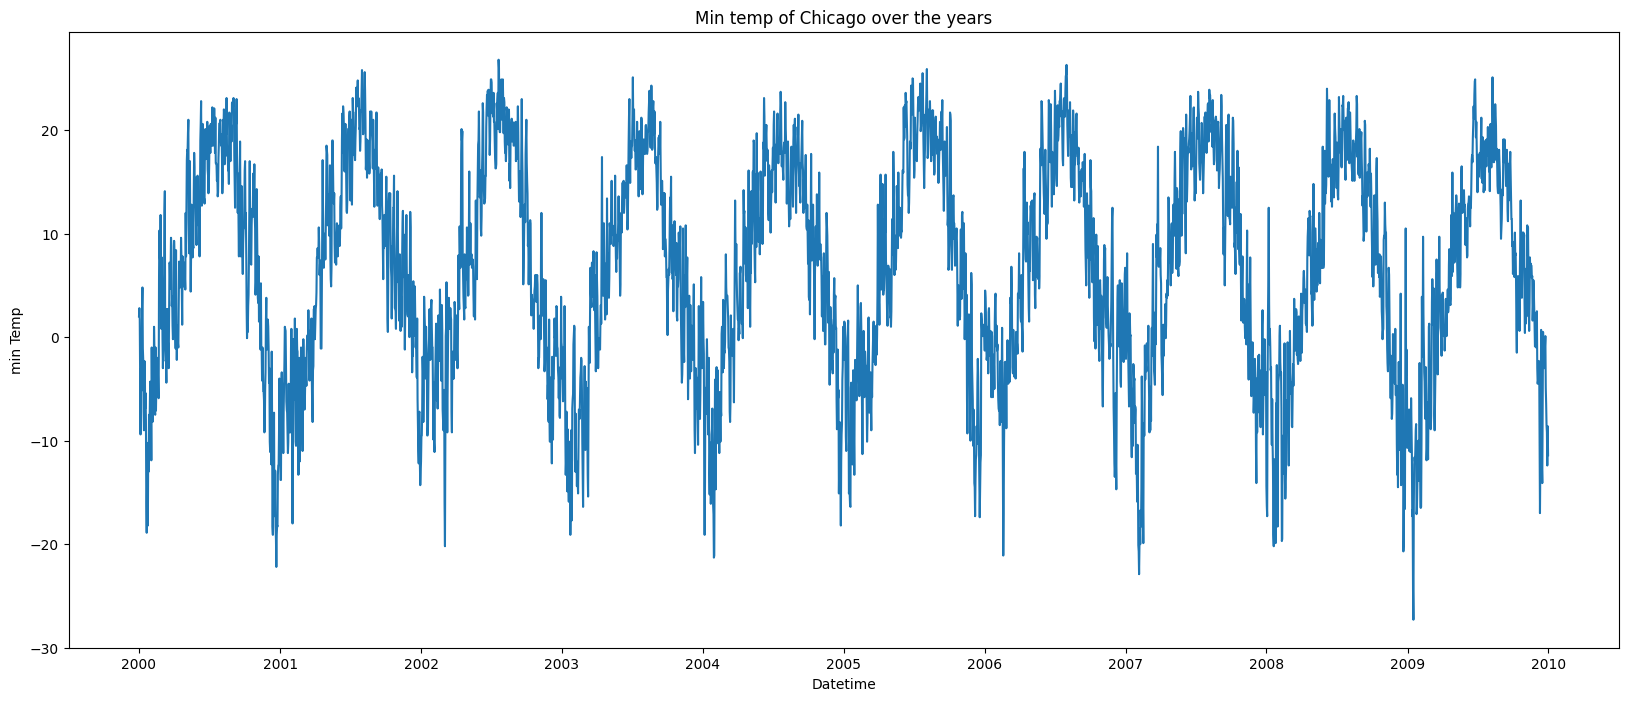

In [12]:
plt.figure(figsize=(20, 8))
plt.plot(data["datetime"], data['tempmin'])
plt.xlabel('Datetime')
plt.ylabel('min Temp')
plt.title('Min temp of Chicago over the years')
plt.show()

In [13]:
from typing import Tuple
def create_data_for_NN(data: pandas.DataFrame, Y_var: str, lag: int, test_ratio: float
) -> Tuple[np.array, np.array, np.array, np.array]:
    y = data[Y_var].tolist()
    X, Y = [], []
    if len(y) - lag <= 0:
        X.append(y)
    else:
        for i in range(len(y) - lag):
            Y.append(y[i + lag])
            X.append(y[i : (i + lag)])

    X, Y = np.array(X), np.array(Y)
    # Reshaping the X array to an LSTM input shape
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    # Creating training and test sets
    X_train = X
    X_test = []
    Y_train = Y
    Y_test = []
    if test_ratio > 0:
        index = round(len(X) * test_ratio)
        X_train = X[: (len(X) - index)]
        X_test = X[-index:]
        Y_train = Y[: (len(X) - index)]
        Y_test = Y[-index:]
    return X_train, X_test, Y_train, Y_test

In [14]:
from sklearn.preprocessing import StandardScaler
def scale_values(X_train, X_test, Y_train, Y_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
    X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)
    scaler = StandardScaler()
    Y_train_scaled = scaler.fit_transform(Y_train.reshape(-1, 1)).reshape(Y_train.shape)
    Y_test_scaled = scaler.transform(Y_test.reshape(-1, 1)).reshape(Y_test.shape)
    return X_train_scaled,X_test_scaled,Y_train_scaled,Y_test_scaled

In [15]:
lag = 3
test_ratio = 0.25
X_train, X_test, Y_train, Y_test = create_data_for_NN(data_tavg, data_tavg.columns[-1], lag, test_ratio)
X_train_scaled,X_test_scaled,Y_train_scaled,Y_test_scaled = scale_values(X_train, X_test, Y_train, Y_test)

In [16]:
model1 = Sequential()
model1.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(Dense(1))

model1.compile(loss='mean_squared_error', optimizer='adam',metrics="mean_squared_error")

model1.fit(X_train_scaled, Y_train_scaled, validation_split = 0.25,  epochs=3, batch_size=72)

Epoch 1/3
29/29 [==============================] - 11s 52ms/step - loss: 0.7742 - mean_squared_error: 0.7742 - val_loss: 0.4173 - val_mean_squared_error: 0.4173
Epoch 2/3
29/29 [==============================] - 0s 13ms/step - loss: 0.2676 - mean_squared_error: 0.2676 - val_loss: 0.1855 - val_mean_squared_error: 0.1855
Epoch 3/3
29/29 [==============================] - 1s 18ms/step - loss: 0.1736 - mean_squared_error: 0.1736 - val_loss: 0.1795 - val_mean_squared_error: 0.1795


In [17]:
from sklearn.metrics import mean_squared_error

pred1 = model1.predict(X_test_scaled)
rmse1 = np.sqrt(mean_squared_error(Y_test_scaled, pred1))


29/29 [==============================] - 2s 9ms/step


In [18]:
print("RMSE for single layer, lag = 3 - ",rmse1)

RMSE for single layer, lag = 3 -  0.41408881224792327


In [19]:
#from google.colab import files
#uploaded = files.upload()
test = pd.read_csv("final_data_2010-2023.csv")
test.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,chicago,2010-01-01,-8.3,-14.5,-11.7,-15.0,-22.4,-19.0,-16.1,69.8,...,6.6,3,NaN,2010-01-01T07:18:22,2010-01-01T16:30:09,0.53,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72534014819,KORD,KMDW,72530094846,74466504838,..."
1,chicago,2010-01-02,-11.4,-16.4,-14.1,-18.4,-25.3,-22.6,-19.6,63.1,...,8.5,4,NaN,2010-01-02T07:18:26,2010-01-02T16:31:02,0.57,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72534014819,KORD,KMDW,72530094846,74466504838,..."
2,chicago,2010-01-03,-7.9,-17.5,-12.5,-14.7,-25.6,-20.5,-17.6,66.0,...,7.6,4,NaN,2010-01-03T07:18:28,2010-01-03T16:31:56,0.60,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72534014819,KORD,KMDW,72530094846,74466504838,..."
3,chicago,2010-01-04,-7.4,-13.1,-10.2,-14.4,-21.3,-17.6,-14.6,69.8,...,3.5,2,NaN,2010-01-04T07:18:27,2010-01-04T16:32:51,0.64,Overcast,Cloudy skies throughout the day.,cloudy,"72534014819,KORD,KMDW,72530094846,74466504838,..."
4,chicago,2010-01-05,-5.1,-9.5,-7.9,-11.7,-15.9,-14.2,-12.3,70.8,...,5.8,3,NaN,2010-01-05T07:18:25,2010-01-05T16:33:49,0.67,Overcast,Cloudy skies throughout the day.,cloudy,"72534014819,KORD,KMDW,72530094846,74466504838,..."


In [20]:
tdata = test[["datetime","tempmax","tempmin","temp"]]
tdata['datetime'] = pd.to_datetime(tdata['datetime'])
tdata.sort_values(by="datetime", inplace=True)
tdata_tmax = tdata[["datetime","tempmax"]]
tdata_tmin = tdata[["datetime","tempmin"]]
tdata_tavg = tdata[["datetime","temp"]]

<ipython-input-20-95b3ae363efa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdata['datetime'] = pd.to_datetime(tdata['datetime'])
<ipython-input-20-95b3ae363efa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdata.sort_values(by="datetime", inplace=True)


In [24]:
def create_tdata_for_NN(data: pandas.DataFrame, Y_var: str, lag: int) -> Tuple[np.array, np.array, np.array]:
    y = data[Y_var].tolist()
    X, Y = [], []
    if len(y) - lag <= 0:
        X.append(y)
    else:
        for i in range(len(y) - lag):
            Y.append(y[i + lag])
            X.append(y[i : (i + lag)])

    X, Y = np.array(X), np.array(Y)
    # Reshaping the X array to an LSTM input shape
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    # Creating training and test sets
    """X_train = X
    X_test = []
    Y_train = Y
    Y_test = []
    if test_ratio > 0:
        index = round(len(X) * test_ratio)
        X_train = X[: (len(X) - index)]
        X_test = X[-index:]
        Y_train = Y[: (len(X) - index)]
        Y_test = Y[-index:]"""
    return X, Y

In [26]:
lag = 3
#test_ratio = 0.25
X,Y = create_tdata_for_NN(tdata_tavg, tdata_tavg.columns[-1], lag)

In [22]:
"""
def scale_tvalues(X,Y):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
    #X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)
    scaler = StandardScaler()
    Y_scaled = scaler.fit_transform(Y.reshape(-1, 1)).reshape(Y.shape)
    #Y_test_scaled = scaler.transform(Y_test.reshape(-1, 1)).reshape(Y_test.shape)
    return X_scaled, Y_scaled
"""

'\ndef scale_tvalues(X,Y):\n    scaler = StandardScaler()\n    X_scaled = scaler.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)\n    #X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)\n    scaler = StandardScaler()\n    Y_scaled = scaler.fit_transform(Y.reshape(-1, 1)).reshape(Y.shape)\n    #Y_test_scaled = scaler.transform(Y_test.reshape(-1, 1)).reshape(Y_test.shape)\n    return X_scaled, Y_scaled\n'

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)
scaler = StandardScaler()
Y_scaled = scaler.fit_transform(Y.reshape(-1, 1)).reshape(Y.shape)
Y_test_scaled = scaler.transform(Y_test.reshape(-1, 1)).reshape(Y_test.shape)

In [28]:
X

array([[[-11.7],
        [-14.1],
        [-12.5]],

       [[-14.1],
        [-12.5],
        [-10.2]],

       [[-12.5],
        [-10.2],
        [ -7.9]],

       ...,

       [[ 27.6],
        [ 28.5],
        [ 28.1]],

       [[ 28.5],
        [ 28.1],
        [ 24.1]],

       [[ 28.1],
        [ 24.1],
        [ 23.2]]])

In [29]:
predf = model1.predict(X)
rmsef = np.sqrt(mean_squared_error(Y, predf))

155/155 [==============================] - 0s 2ms/step


In [30]:
rmsef

13.891210387349807

In [31]:
predf

array([[-3.68804  ],
       [-3.7425308],
       [-3.7281694],
       ...,
       [ 2.3427896],
       [ 2.389158 ],
       [ 2.4342332]], dtype=float32)

In [54]:
# Predict on the new data
pred_scaled = model1.predict(X_scaled)
rmse_scaled = np.sqrt(mean_squared_error(Y_scaled, pred_scaled))

155/155 [==============================] - 1s 8ms/step


In [56]:
rmse_scaled

0.41245417513658095

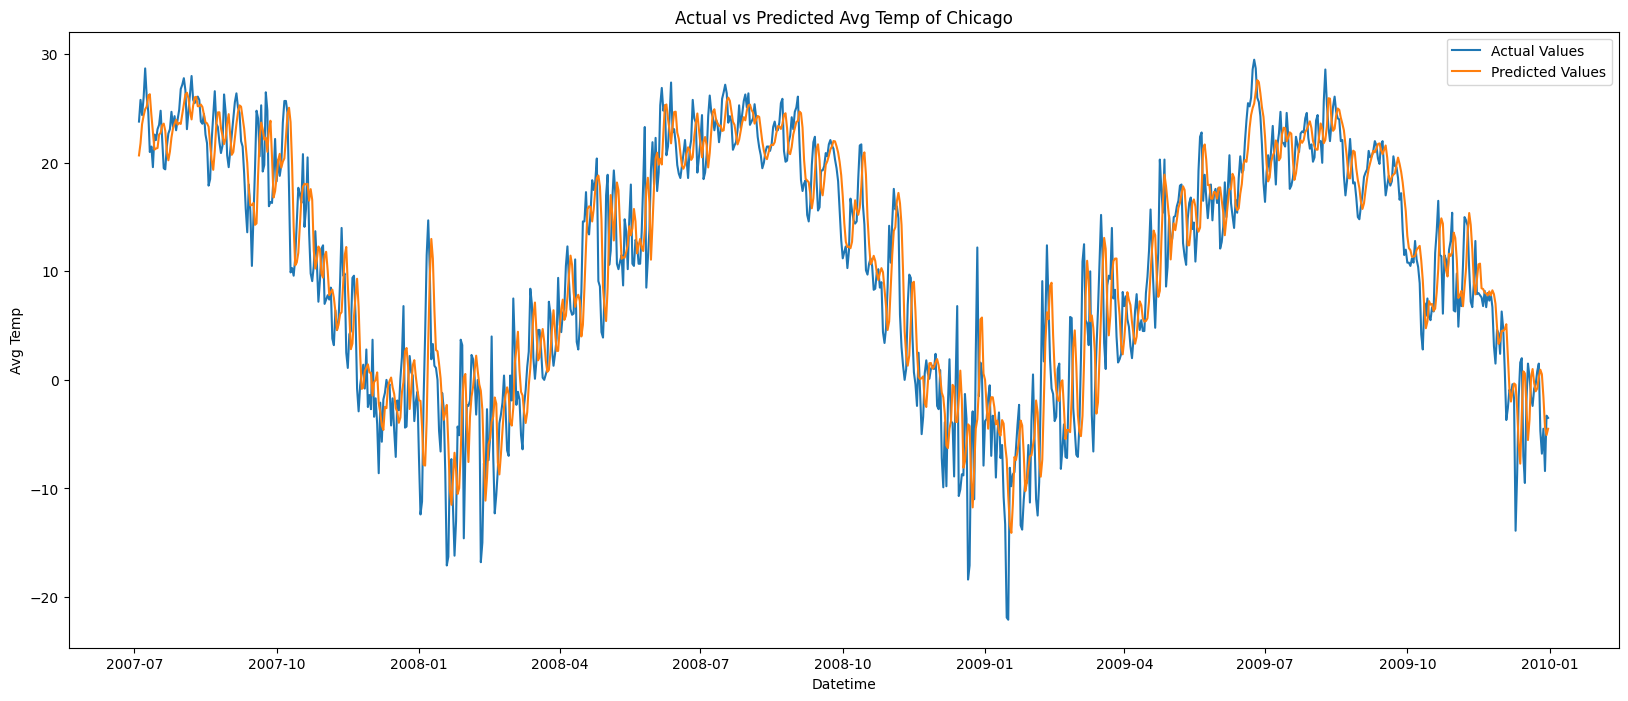

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Denormalize the scaled predictions and actual values
pred_1 = scaler.inverse_transform(predf)
pred1_denorm = scaler.inverse_transform(pred1)  # Assuming pred1_scaled is the scaled prediction array

# You also need to denormalize Y_test_scaled
Y_test_scaled_2d = Y_test_scaled.reshape(-1, 1)
Y_test_denorm = scaler.inverse_transform(Y_test_scaled_2d)

# Plotting the original values and predictions
plt.figure(figsize=(20, 8))
plt.plot(data["datetime"][-len(pred1_denorm):], Y_test_denorm, label='Actual Values')
plt.plot(data["datetime"][-len(pred1_denorm):], pred1_denorm, label='Predicted Values')
plt.xlabel('Datetime')
plt.ylabel('Avg Temp')
plt.title('Actual vs Predicted Avg Temp of Chicago')
plt.legend()
plt.show()

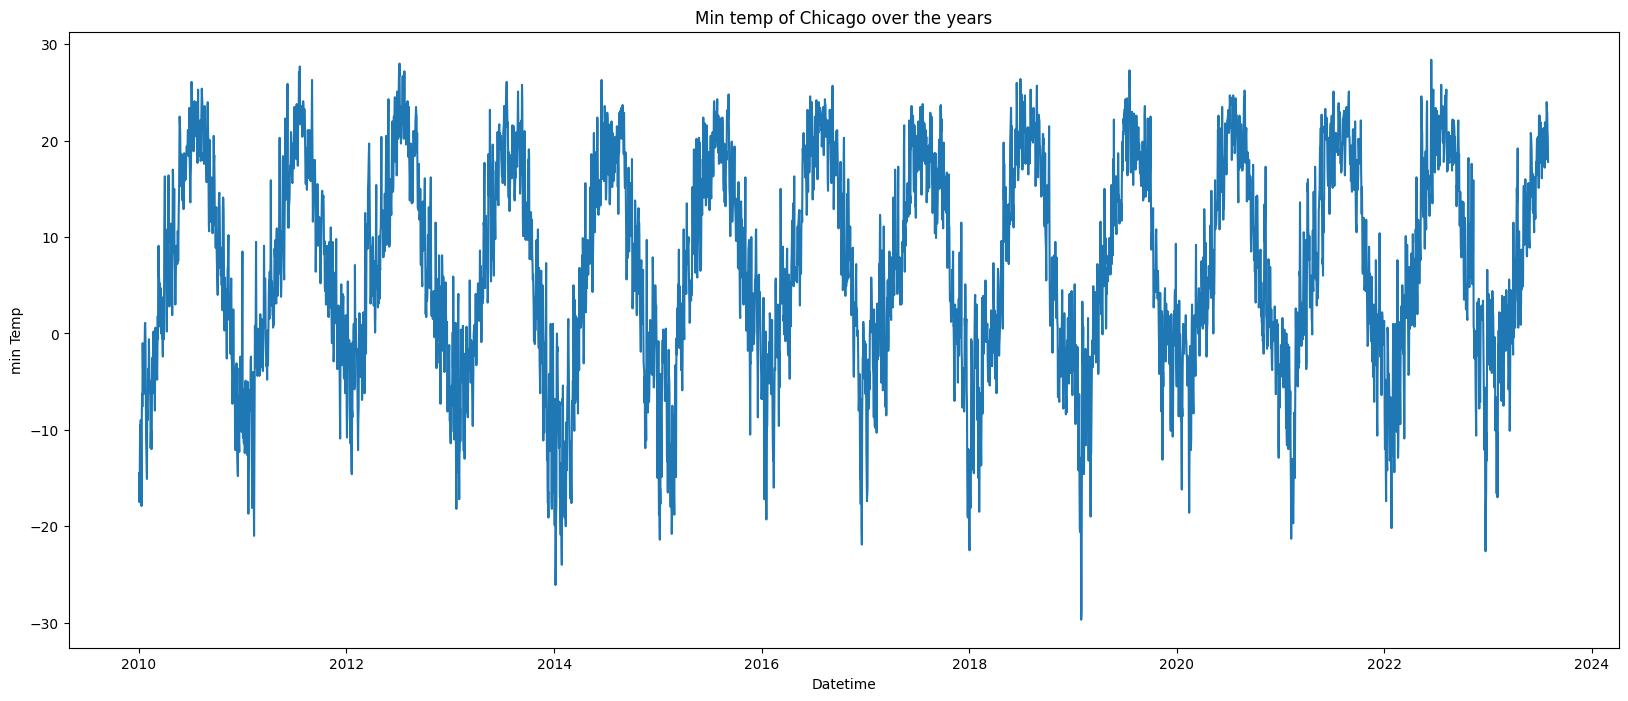

In [33]:
plt.figure(figsize=(20, 8))
plt.plot(tdata["datetime"], tdata['tempmin'])
plt.xlabel('Datetime')
plt.ylabel('min Temp')
plt.title('Min temp of Chicago over the years')
plt.show()

In [34]:
lag = 3
X_new, Y_new = create_tdata_for_NN(tdata_tavg, tdata_tavg.columns[-1], lag)

X_new_scaled = scaler.transform(X_new.reshape(-1, X_new.shape[-1])).reshape(X_new.shape)
Y_new_scaled = scaler.transform(Y_new.reshape(-1, 1)).reshape(Y_new.shape)

In [48]:
# Predict on the new data
pred_new = model1.predict(X_new)
rmse_new = np.sqrt(mean_squared_error(Y_new, pred_new))

155/155 [==============================] - 2s 12ms/step


In [49]:
rmse_new

13.891210387349807

In [52]:
# Predict on the new data
pred_new_scaled = model1.predict(X_new_scaled)
rmse_new_scaled = np.sqrt(mean_squared_error(Y_new_scaled, pred_new_scaled))

155/155 [==============================] - 1s 9ms/step


In [53]:
rmse_new_scaled

0.41244660692296664

In [36]:
# Denormalize the scaled predictions and actual values for the new data
pred_new_denorm = scaler.inverse_transform(pred_new)
Y_new_scaled_2d = Y_new_scaled.reshape(-1, 1)
Y_new_denorm = scaler.inverse_transform(Y_new_scaled_2d)

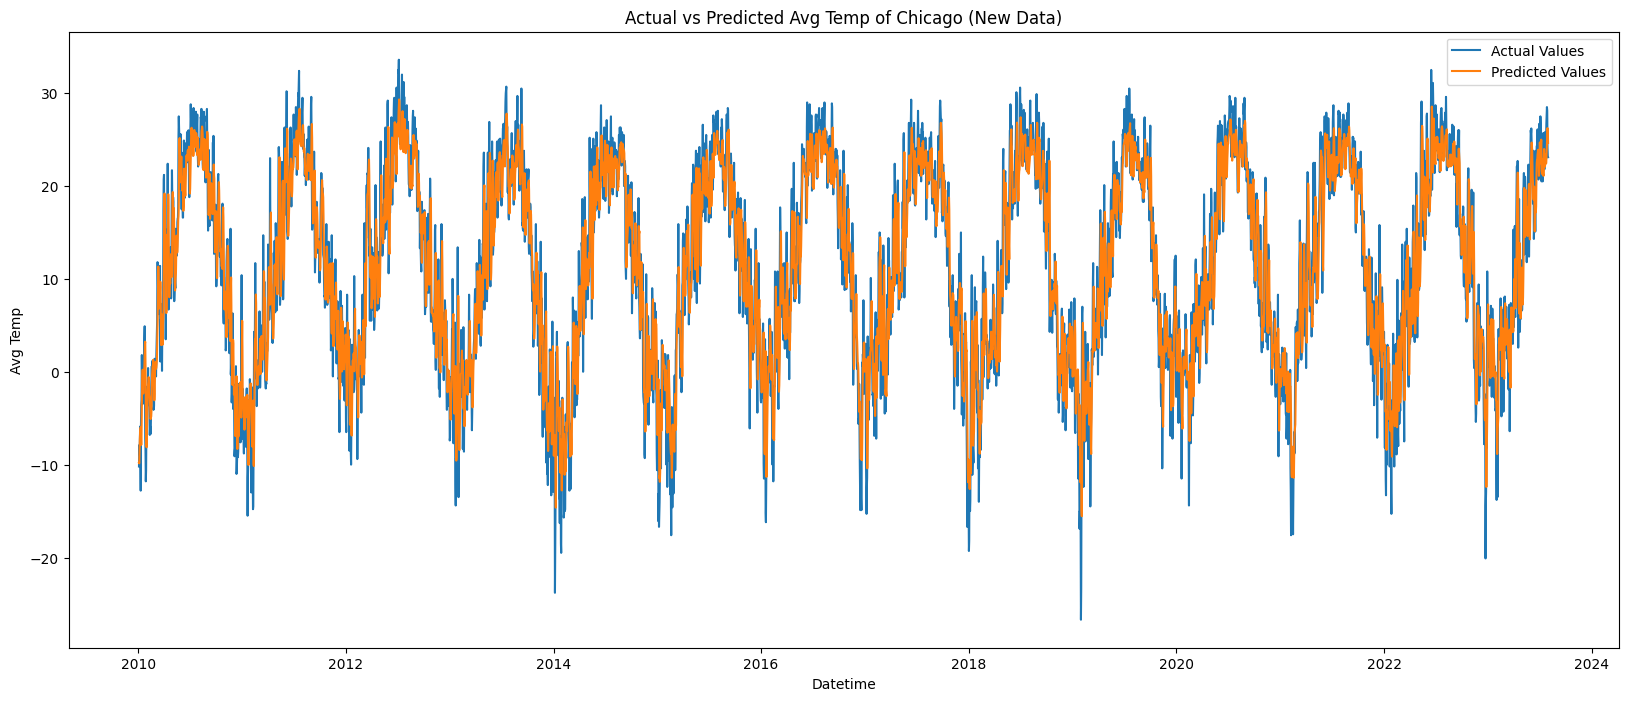

In [46]:
# Plotting the original values and predictions for the new data
plt.figure(figsize=(20, 8))
plt.plot(tdata["datetime"][-len(pred_new_denorm):], Y_new_denorm, label='Actual Values')
plt.plot(tdata["datetime"][-len(pred_new_denorm):], pred_new_denorm, label='Predicted Values')
plt.xlabel('Datetime')
plt.ylabel('Avg Temp')
plt.title('Actual vs Predicted Avg Temp of Chicago (New Data)')

# Set the x-axis limits to the range between 2015 and 2024
#plt.xlim(pd.Timestamp('2015-01-01'), pd.Timestamp('2024-12-31'))

plt.legend()
plt.show()